In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [24]:
from sklearn.datasets import fetch_openml
x,y=fetch_openml('mnist_784',return_X_y=True,version=1)
x=np.array(x)

C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
x.shape

(70000, 784)

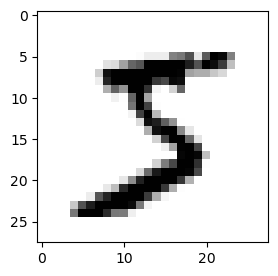

In [5]:
plt.figure(figsize=(3,3))
plt.imshow(x[0].reshape(28,28),cmap=mpl.cm.binary)
plt.show()

In [6]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
z=pca.fit_transform(x)

In [7]:
pca.n_components_

154

In [8]:
np.sum(pca.explained_variance_ratio_)

0.950349970207861

In [9]:
x.shape,z.shape

((70000, 784), (70000, 154))

In [10]:
wd=pca.components_.T
wd.shape

(784, 154)

In [11]:
s2=pca.explained_variance_
len(s2)

154

In [13]:
xr=pca.inverse_transform(z)

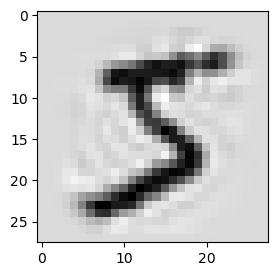

In [14]:
plt.figure(figsize=(3,3))
plt.imshow(xr[0].reshape(28,28),cmap=mpl.cm.binary)
plt.show()

In [15]:
rnd_pca=PCA(n_components=154,svd_solver='randomized',random_state=1)
z_rnd=rnd_pca.fit_transform(x)

In [16]:
xr_rnd=rnd_pca.inverse_transform(z_rnd)

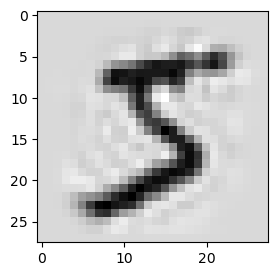

In [17]:
plt.figure(figsize=(3,3))
plt.imshow(xr_rnd[0].reshape(28,28),cmap=mpl.cm.binary)
plt.show()

In [18]:
from sklearn.decomposition import IncrementalPCA
inc_pca=IncrementalPCA(n_components=154,batch_size=700)
z_inc=inc_pca.fit_transform(x)

In [19]:
xr_inc=inc_pca.inverse_transform(z_inc)

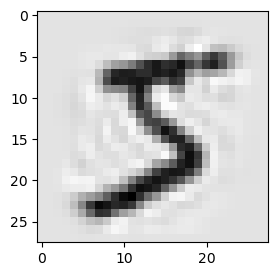

In [20]:
plt.figure(figsize=(3,3))
plt.imshow(xr_inc[0].reshape(28,28),cmap=mpl.cm.binary)
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
from sklearn.datasets import make_swiss_roll
x,t=make_swiss_roll(n_samples=1000,noise=0.3,random_state=1)

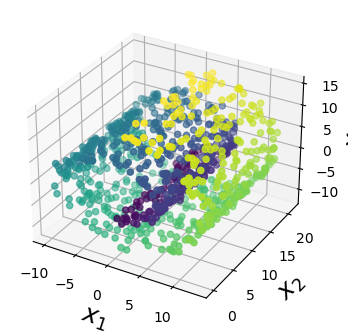

In [3]:
fig=plt.figure(figsize=(4,4))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x[:,0],x[:,1],x[:,2],c=t)
ax.set_xlabel('$x_1$',fontsize=18)
ax.set_ylabel('$x_2$',fontsize=18)
ax.set_zlabel('$x_3$',fontsize=18)
plt.show()

In [4]:
from sklearn.decomposition import KernelPCA
poly_pca=KernelPCA(n_components=2,kernel='poly',gamma=0.01,coef0=1,fit_inverse_transform=True)
z_poly=poly_pca.fit_transform(x)

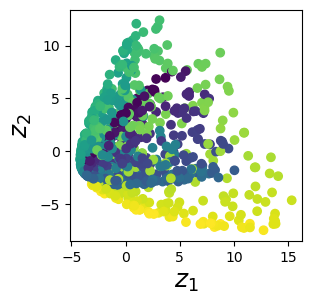

In [5]:
plt.figure(figsize=(3,3))
plt.scatter(z_poly[:,0],z_poly[:,1],c=t)
plt.xlabel('$z_1$',fontsize=18)
plt.ylabel('$z_2$',fontsize=18)
plt.show()

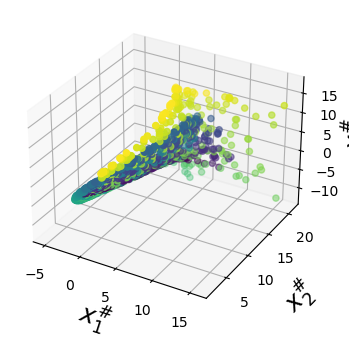

In [9]:
xp_poly=poly_pca.inverse_transform(z_poly)
plt.figure(figsize=(4,4))
ax=plt.subplot(111,projection='3d')
ax.scatter(xp_poly[:,0],xp_poly[:,1],xp_poly[:,2],c=t)
ax.set_xlabel('$x_1^\#$',fontsize=18)
ax.set_ylabel('$x_2^\#$',fontsize=18,labelpad=10)
ax.set_zlabel('$x_3^\#$',fontsize=18)
plt.show()

In [10]:
y=t>7

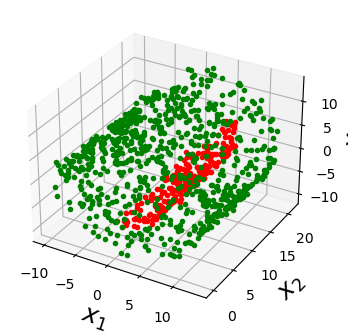

In [11]:
plt.figure(figsize=(4,4))
ax=plt.subplot(111,projection='3d')
ax.plot(x[y==0,0],x[y==0,1],x[y==0,2],"r.")
ax.plot(x[y==1,0],x[y==1,1],x[y==1,2],"g.")
ax.set_xlabel('$x_1$',fontsize=18)
ax.set_ylabel('$x_2$',fontsize=18)
ax.set_zlabel('$x_3$',fontsize=18)
plt.show()

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [15]:
clf=Pipeline([
    ('kpca',KernelPCA(n_components=2,fit_inverse_transform=True)),
    ('log_reg',LogisticRegression())
])
param_grid=[{
    'kpca__gamma':np.linspace(0.01,0.06,11),
    'kpca__kernel':['poly','rbf','sigmoid']
}]

In [16]:
grid_search=GridSearchCV(clf,param_grid,scoring='accuracy',cv=3)
grid_search.fit(x,y)
grid_search.best_params_

{'kpca__gamma': 0.045, 'kpca__kernel': 'rbf'}

In [17]:
grid_search.best_score_

0.9029928131724537

In [18]:
best_pca=grid_search.best_estimator_['kpca']

In [19]:
z=best_pca.fit_transform(x)
z

array([[-0.26147759,  0.04307511],
       [ 0.07137821, -0.16452925],
       [ 0.28599387, -0.22994784],
       ...,
       [ 0.03082533, -0.18064163],
       [-0.1301833 ,  0.05965961],
       [ 0.04506277, -0.05346541]])

In [20]:
xp=best_pca.inverse_transform(z)

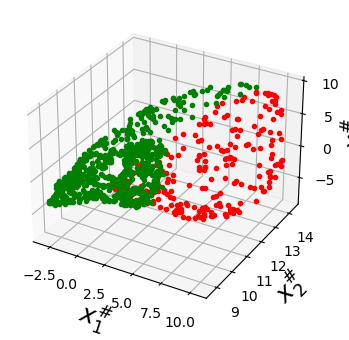

In [21]:
plt.figure(figsize=(4,4))
ax=plt.subplot(111,projection='3d')
ax.plot(xp[y==0,0],xp[y==0,1],xp[y==0,2],"r.")
ax.plot(xp[y==1,0],xp[y==1,1],xp[y==1,2],"g.")
ax.set_xlabel('$x_1^\#$',fontsize=18)
ax.set_ylabel('$x_2^\#$',fontsize=18)
ax.set_zlabel('$x_3^\#$',fontsize=18)
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(x, xp)

29.741749195059644

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
from sklearn.datasets import make_swiss_roll
x,t=make_swiss_roll(n_samples=1000,noise=0.3,random_state=1)

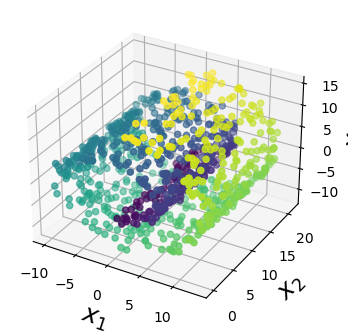

In [32]:
fig=plt.figure(figsize=(4,4))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x[:,0],x[:,1],x[:,2],c=t)
ax.set_xlabel('$x_1$',fontsize=18)
ax.set_ylabel('$x_2$',fontsize=18)
ax.set_zlabel('$x_3$',fontsize=18)
plt.show()

In [33]:
from sklearn.manifold import LocallyLinearEmbedding
lle=LocallyLinearEmbedding(n_components=2,n_neighbors=8,random_state=1)
z=lle.fit_transform(x)

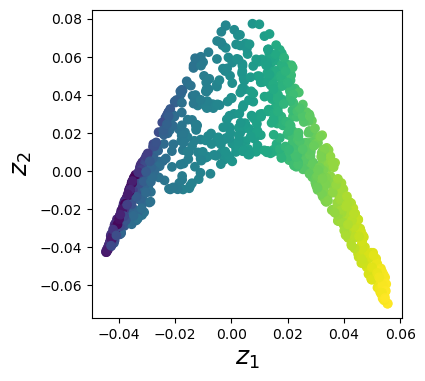

In [34]:
fig=plt.figure(figsize=(4,4))
plt.scatter(z[:,0],z[:,1],c=t)
plt.xlabel('$z_1$',fontsize=18)
plt.ylabel('$z_2$',fontsize=18)
plt.show()